In [2]:
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import models
from keras import layers

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [3]:
network = models.Sequential()
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [5]:
# 25000 train, 10000 validation, 15000 test

x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')
x_val = vectorize_sequences(test_data[:10000])
y_val = np.asarray(test_labels[:10000]).astype('float32')
x_test = vectorize_sequences(test_data[10000:])
y_test = np.asarray(test_labels[10000:]).astype('float32')

# lub sklearn.model_selection.train_test_split

In [5]:
history = network.fit(x_train, y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.7432 - loss: 0.5646 - val_accuracy: 0.8556 - val_loss: 0.3709
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8997 - loss: 0.2959 - val_accuracy: 0.8821 - val_loss: 0.2962
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9206 - loss: 0.2242 - val_accuracy: 0.8869 - val_loss: 0.2803
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9357 - loss: 0.1872 - val_accuracy: 0.8837 - val_loss: 0.2911
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9440 - loss: 0.1627 - val_accuracy: 0.8783 - val_loss: 0.3072
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9513 - loss: 0.1402 - val_accuracy: 0.8750 - val_loss: 0.3222
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9567 - loss: 0.1264 - val_accuracy: 0.8710 - val_loss: 0.3503
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9613 - loss: 0.1137 - val_accuracy: 0.8718 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


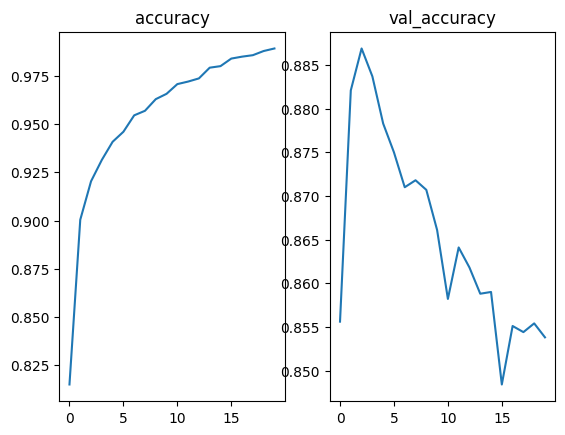

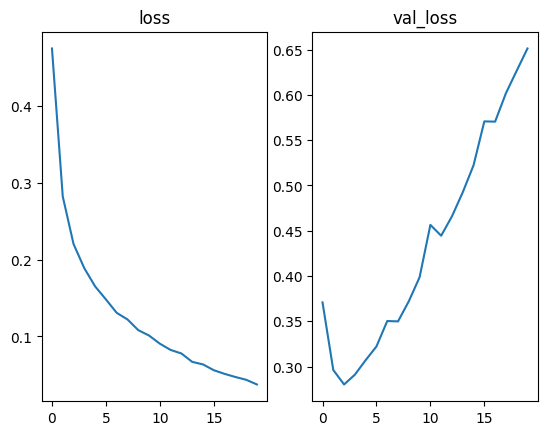

In [6]:
history_dict = history.history
print(history_dict.keys())

fig, ax = plt.subplots(1, 2)
ax[0].plot(history_dict['accuracy'])
ax[0].set_title('accuracy')
ax[1].plot(history_dict['val_accuracy'])
ax[1].set_title('val_accuracy')
plt.show()

fig, ax = plt.subplots(1, 2)
ax[0].plot(history_dict['loss'])
ax[0].set_title('loss')
ax[1].plot(history_dict['val_loss'])
ax[1].set_title('val_loss')
plt.show()


In [7]:
test_loss, test_acc = network.evaluate(x_test, y_test)

print('test_acc:', test_acc)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8502 - loss: 0.6628
test_acc: 0.8560666441917419


## Część II

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8254 - loss: 0.4084
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9215 - loss: 0.2041
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9382 - loss: 0.1655
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9456 - loss: 0.1507
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9543 - loss: 0.1278
Epoch 6/10
767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9608 - loss: 0.1159
Reached 95% accuracy so cancelling training!
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9607 - loss: 0.1161
dict_keys(['accuracy', 'loss'])


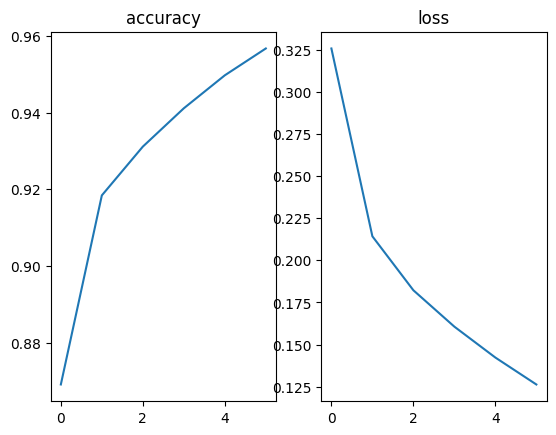

In [6]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True


callbacks = myCallback()

network2 = models.Sequential()
network2.add(layers.Dense(16, activation='relu'))
network2.add(layers.Dense(16, activation='relu'))
network2.add(layers.Dense(1, activation='sigmoid'))

network2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history2 = network2.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

history_dict = history2.history
print(history_dict.keys())

fig, ax = plt.subplots(1, 2)
ax[0].plot(history_dict['accuracy'])
ax[0].set_title('accuracy')
ax[1].plot(history_dict['loss'])
ax[1].set_title('loss')
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
# alternatively from scikeras.wrappers import KerasClassifier
# in Google Colab you may need to use !pip install scikeras
# in a block before for it to work properly.

def create_model():
    network = models.Sequential()
    network2.add(layers.Dense(16, activation='relu'))
    network2.add(layers.Dense(16, activation='relu'))
    network2.add(layers.Dense(1, activation='sigmoid'))

    network2.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

    return network


model = KerasClassifier(build_fn=create_model)

par1_batch = [32, 64]
par2_epoch = [3, 5]

param_grid = dict(batch_size=par1_batch,
                  epochs=par2_epoch
                  )

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv = 3
                    )

grid_results = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

AttributeError: 'super' object has no attribute '__sklearn_tags__'